[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# NBeats

This is a NBeats model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models

We used as the base the implementation of NBeats from Pytorch Forecasting library. The model parameters are inherited automatically from the dataset structure, if from_dataset is set to True
For more detail on hyperparameters, please follow https://github.com/jdb78/pytorch-forecasting/blob/master/pytorch_forecasting/models/nbeats/__init__.py

In [ ]:
# install NeuralProphet from our repository
!pip install git+https://github.com/adasegroup/neural_prophet.git # may take a while

In [207]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [208]:
from neuralprophet import NBeats
import pandas as pd

In [215]:
if 'google.colab' in str(get_ipython()):
    data_location = "https://raw.githubusercontent.com/adasegroup/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
freq = '5min'


In [216]:
m = NBeats(
        n_lags=12,
        n_forecasts = 3,
        batch_size = None,
        epochs = 100,
        num_gpus = 0,
        patience_early_stopping = 10,
        early_stop = True,
        weight_decay=1e-2,
        learning_rate=3e-2,
        auto_lr_find=False,
        num_workers=3,
    )

In [217]:
metrics = m.fit(df, freq = freq)
future = m.make_future_dataframe(df, freq, n_historic_predictions=True)
forecast = m.predict(future)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name            | Type       | Params
-----------------------------------------------
0 | loss            | MASE       | 0     
1 | logging_metrics | ModuleList | 0     
2 | net_blocks      | ModuleList | 1.6 M 
-----------------------------------------------
1.6 M     Trainable params
0         Non-trainable params
1.6 M     Total params
6.434     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/polina/.conda/envs/neural_prophet/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)



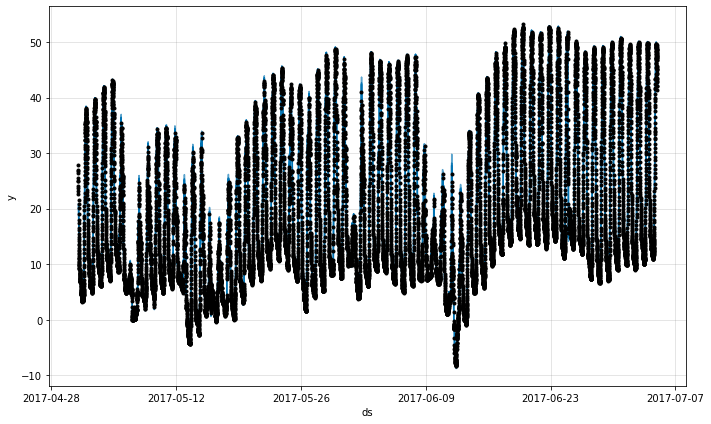

In [218]:
f = m.plot(forecast)

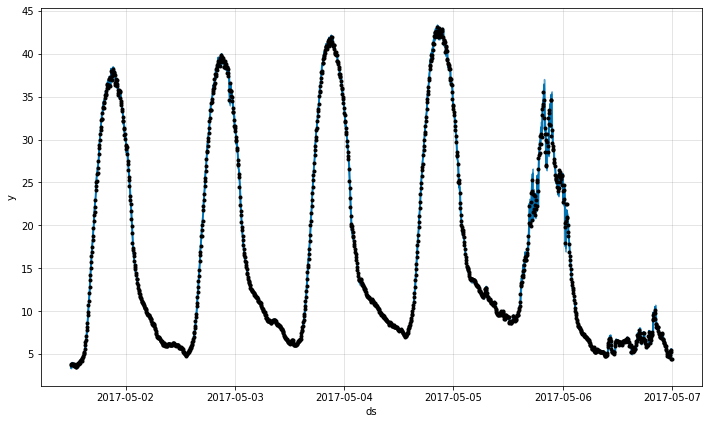

In [219]:
fig = m.plot(forecast[144:6*288])